<a href="https://colab.research.google.com/github/ravina-essex/CE888_2021/blob/Main/Fire_vs_nonFire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fire Detection**

In [44]:
#import basic packages
import numpy as np 
import pandas as pd 

In [45]:
train_images='/content/drive/MyDrive/Colab Notebooks/Firedetection/Train/Train'
test_images='/content/drive/MyDrive/Colab Notebooks/Firedetection/Test/Test'

In [3]:
IMAGE_SIZE = (32,32)
trainLables, trainImages=[], []
testLables, testImages=[], []
type_fire =["Fire","No_Fire"]

In [2]:
# load data
import os
import cv2 
def load_data(directory,image_list,lable_list):
    for root, dirs, files in os.walk(directory, topdown=False):
        for dir_name in dirs: 
            for type_name in type_fire: 
                if dir_name.startswith(type_name):                    
                    for filenames in os.listdir(directory +"/"+dir_name):      
                        image = cv2.imread(directory +"/"+ dir_name +"/"+filenames)
                        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                        image = cv2.resize(image, IMAGE_SIZE) 
                        image_list.append(image)
                        lable_list.append(type_fire.index(type_name))
                    
# load train data                   
load_data(train_images,trainImages,trainLables) 
print('Train images ',len(trainImages))
print('Train lables ',len(trainLables))



# load test data
load_data(test_images,testImages,testLables) 
print("Test images  ",len(testImages))
print("Test lables  ",len(testLables))



train_images = np.array(trainImages, dtype = 'float32')
train_labels = np.array(trainLables, dtype = 'i')                      
test_images  = np.array(testImages, dtype = 'float32')
test_labels  = np.array(testLables, dtype = 'i')

NameError: ignored

In [33]:
# load the required libraries 
import os
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import cv2 
import pandas as pd
import tensorflow as tf 
import seaborn as sn
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.metrics import zero_one_loss,confusion_matrix
from keras.layers import Activation,Dropout,Flatten,Dense,MaxPooling2D
from keras.layers import GlobalAveragePooling2D,Conv2D,BatchNormalization,Dropout
from keras.applications.vgg16 import VGG16
from keras.applications import MobileNetV2,MobileNet,ResNet50
from keras.models import Model
from keras.callbacks import EarlyStopping

In [43]:
# pre-process the data

train_images = train_images / 255.0
test_images  = test_images / 255.0

# shuffle the data
train_images,train_labels = shuffle(train_images,train_labels)
test_images,test_labels  = shuffle(test_images,test_labels )

no_of_classes = len(np.unique(train_labels))
train_labels = np_utils.to_categorical(train_labels,no_of_classes)
test_labels = np_utils.to_categorical(test_labels,no_of_classes)

ValueError: ignored

IndexError: ignored

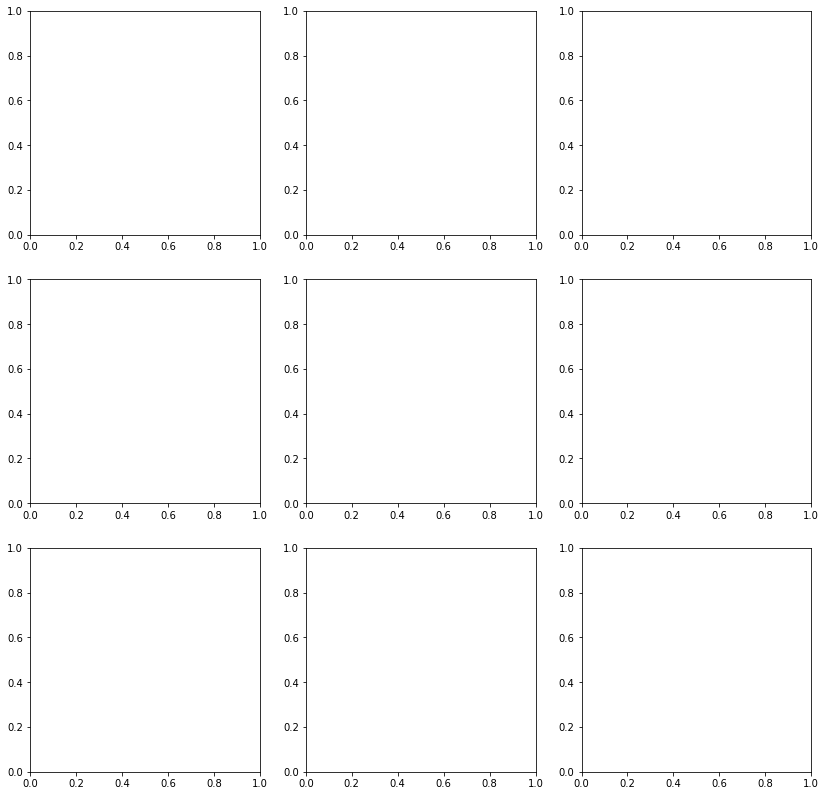

In [35]:
fig, axis = plt.subplots(3, 3, figsize=(14, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(test_images[i])        
    test_labels_idx = np.argmax(test_labels[i])
    ax.axis('off')
    ax.set(title = f"{type_fire[test_labels_idx]} ")

In [36]:
modelFFN1 = tf.keras.Sequential()
modelFFN1.add(Dense(12,input_shape = (32,32, 3), activation='relu'))
modelFFN1.add(Flatten()) 
modelFFN1.add(Dense(10 , activation='sigmoid')) 
modelFFN1.compile(loss ='categorical_crossentropy',optimizer ='adam',metrics =['accuracy'])
modelFFN1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32, 32, 12)        48        
_________________________________________________________________
flatten_1 (Flatten)          (None, 12288)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                122890    
Total params: 122,938
Trainable params: 122,938
Non-trainable params: 0
_________________________________________________________________


In [37]:
historyFFN1 = modelFFN1.fit(train_images, train_labels, epochs=10,validation_data=(test_images, test_labels) )

Epoch 1/10


ValueError: ignored

In [38]:
modelFFN1.evaluate(test_images,  test_labels, verbose=2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:645: RuntimeWarning: divide by zero encountered in log10
  numdigits = int(np.log10(self.target)) + 1


OverflowError: ignored

In [39]:
def zero_one(pred_labels,test_labels):

    pred_labels_idx = []
    for i in range(len(pred_labels)):
        pred_labels_idx.append(np.argmax(pred_labels[i])) 
    
    test_labels_idx = []
    for i in range(len(test_labels)):
        test_labels_idx.append(np.argmax(test_labels[i]))     

    return zero_one_loss(test_labels_idx, pred_labels_idx)

In [40]:
pred_labels = modelFFN1.predict(test_images)
zo_lossFFN1 = zero_one(pred_labels,test_labels)
print("Zero one loss: ",zo_lossFFN1)

ValueError: ignored

In [41]:
acc = historyFFN1.history['accuracy']
val_acc = historyFFN1.history['val_accuracy']

loss = historyFFN1.history['loss']
val_loss = historyFFN1.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

NameError: ignored

IndexError: ignored

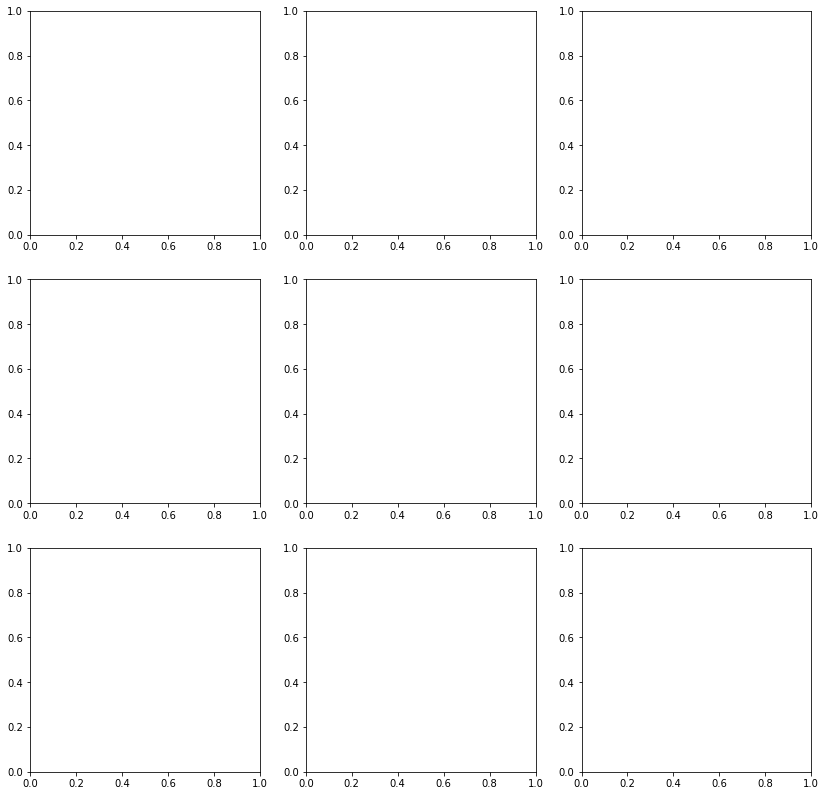

In [42]:
fig, axis = plt.subplots(3, 3, figsize=(14, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(test_images[i])    
    pred_idx = np.argmax(pred_labels[i])
    test_labels_idx = np.argmax(test_labels[i])
    ax.axis('off')
    ax.set(title = f"{type_fire[test_labels_idx]} : {type_fire[pred_idx]}")